# A Movie Recommendation System using User Based Collaborative Filtering
The recommender is created using data from [GroupLens](https://grouplens.org/) where movie and other data is made public for research and other purposes. The two files *u.item* & *u.data* containing movie rating data of the 90's movies were downloaded.

### Importing the necessary modules

In [27]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

### Read the files
##### Reshape the dataframes and merge 

In [8]:
ratings_df = pd.read_csv(r'u.data', sep='\t', encoding='ISO-8859-1', usecols=range(3), names=['userID', 'movieID', 'rating'])
titles_df = pd.read_csv(r'u.item', sep='|', encoding='ISO-8859-1', usecols=range(2), names=['movieID', 'title'])
ratings_df = pd.merge(ratings_df, titles_df, how='inner', on='movieID').reset_index(drop=True)
ratings_df.head()

,userID,movieID,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)


### Removing outliers
##### Get a boxplot to find outliers

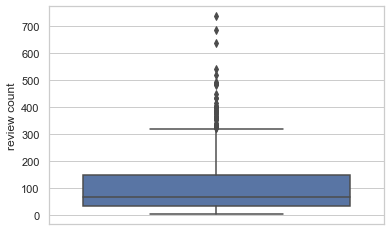

In [9]:
count_df = ratings_df.groupby('userID')['movieID'].agg([np.size]).rename(columns={'size': 'review count'}).reset_index()
sb.set(style='whitegrid')
sb.boxplot(y=count_df['review count'])

Evidently  from the boxplot its seen that outliers are those who gave away more than 320 ratings. So will drop the user IDs of those who rated more than
320 movies.


### Removing outliers & creating a sparse matrix using pivot table

In [10]:
count_df = count_df[count_df['review count'] < 320].reset_index(drop=True)
ratings_df = ratings_df[ratings_df['userID'].isin(count_df['userID'])]
pivot1 = ratings_df.pivot_table(index='userID', columns='title', values='rating')
pivot1.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,"World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Year of the Horse (1997),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown
userID,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,5.0,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Creation of corelation matrix

To set the min_periods it is needed to understand the statistics of number of ratings given per movie

In [11]:
times_a_movie_was_rated = pivot1.count(axis=0)
times_a_movie_was_rated.head()

title
'Til There Was You (1997)      8
1-900 (1994)                   3
101 Dalmatians (1996)         96
12 Angry Men (1957)          106
187 (1997)                    34
dtype: int64

##### Boxplot to find outliers or exceptionally popular movies

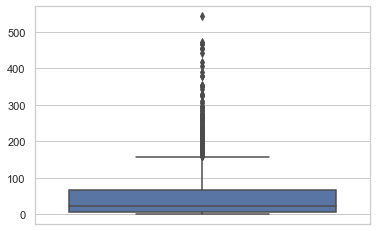

In [13]:
sb.boxplot(y=times_a_movie_was_rated)
plt.show()

Here I would take the outliers values because those are the insanely most rated movies and are better recommendations. The value is 159.
So we will calculate corelation with movies which are at least rated by 159 users.

### Creating sparse corelation matrix

In [19]:
corelated = pivot1.corr(method='pearson', min_periods=159)
corelated.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,"World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Year of the Horse (1997),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### An intuition of the filtering strength
##### Lets check the movies similar to Star Wars (1977)

In [17]:
Star_Wars_rating = corelated['Star Wars (1977)'].sort_values(ascending=False).dropna()
Star_Wars_rating.head()

title
Star Wars (1977)                   1.000000
Empire Strikes Back, The (1980)    0.748525
Return of the Jedi (1983)          0.672594
Raiders of the Lost Ark (1981)     0.534503
Sting, The (1973)                  0.409220
Name: Star Wars (1977), dtype: float64

A pretty good match!

### Building Recommendation engine
- Similar movies to the movies rated by the user will be found out using the corelation matrix.
- The similarity score will be boosted for higher ratings and will be penalized for lower ratings.
- A list of desired number of recommenations are presented excluding the ones already seen by the user.


##### Now we will recommend movies for the person with user ID '0' based on his ratings on various movies

First lets see how the user with ID number 0 has rated the movies

In [25]:
user_ratings = ratings_df[ratings_df['userID'] == 0].set_index('title').rating
user_ratings.head()

title
Star Wars (1977)                   5
Empire Strikes Back, The (1980)    5
Gone with the Wind (1939)          1
Name: rating, dtype: int64

Looks like the user likes science fiction/action/fantasy movies and hates romantic movies! Lets see how well the recommender performs -
(We'll look at the top 10 movie recommendations from the engine excluding the ones rated or watched by the user)

In [26]:
recommendation = pd.Series(dtype=float)
for ind in user_ratings.index:
    suggestions = corelated[ind].dropna()
    if len(suggestions.index) != 0:
        if user_ratings[ind] >= 3:
            suggestions = suggestions.apply(lambda x: x * user_ratings[ind])
            recommendation = recommendation.append(suggestions)
        if user_ratings[ind] < 3:
            suggestions = suggestions.apply(lambda x: (-x) * user_ratings[ind])
            recommendation = recommendation.append(suggestions)

recommendation = recommendation.groupby(recommendation.index).sum().sort_values(ascending=False)
recommendation = recommendation[recommendation.index.isin(user_ratings)==False]

recommendation.head(10)

Empire Strikes Back, The (1980)              8.742626
Star Wars (1977)                             8.742626
Return of the Jedi (1983)                    7.081769
Raiders of the Lost Ark (1981)               5.415858
Star Trek: The Wrath of Khan (1982)          3.705097
Indiana Jones and the Last Crusade (1989)    3.308660
Wizard of Oz, The (1939)                     3.192168
Princess Bride, The (1987)                   3.017603
Back to the Future (1985)                    2.906985
Star Trek: First Contact (1996)              2.886999
dtype: float64

Results look good intuitively. However tests might be performed to check if the user will actually like or not like the movies suggested. On of the ways to do this would be to use a train test method and match the predictions vs user ratings. To be more clear, the rating data could be split using train test and this model could be prepred using the training data. Afterwards using this model we could try predicting the ratings of the test users and match it with the actual ratings. But such test can't completely evaluate a recommender engine because users may like what they have never seen before. If the recommender gives the user a suggestion to watch movie 'X' which he hasn't watched and therefore did not rate also. But just because he didn't rate it doesn't mean that thehe won't enjoy the movie.